In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing libraries
import networkx as nx
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
#Creating a Directed graph from the given edgelist
Graphtype = nx.DiGraph()
filepath = 'drive/MyDrive/GNN_datasets/amazon0601.txt'
G = nx.read_edgelist(
    filepath,
    comments='#',
     
    create_using=Graphtype,
    nodetype=int
)

In [ ]:
#Reading Metdadata
df = pd.read_csv('drive/MyDrive/GNN_datasets/finalpreprocesseddata.csv')

In [ ]:
df.head()

,ID,ASIN,title,group,salesrank,num_categories,totalreviews,downloadedreviews,avg_rating
0,1,0827229534,Patterns of Preaching,Book,396585,2,2,2,5.0
1,2,0738700797,Candlemas,Book,168596,2,12,12,4.5
2,3,0486287785,World War II Allied Fighter Planes Trading Cards,Book,1270652,1,1,1,5.0
3,4,0842328327,Life Application Bible Commentary,Book,631289,5,1,1,4.0
4,5,1577943082,Prayers That Avail Much for Business,Book,455160,2,0,0,0.0


In [ ]:
#checking null values
df.isnull().sum()

ID                   0
ASIN                 0
title                2
group                0
salesrank            0
num_categories       0
totalreviews         0
downloadedreviews    0
avg_rating           0
dtype: int64

In [ ]:
#dropping null values
df = df.dropna()

In [ ]:
df.isnull().sum()

ID                   0
ASIN                 0
title                0
group                0
salesrank            0
num_categories       0
totalreviews         0
downloadedreviews    0
avg_rating           0
dtype: int64

In [ ]:
df['group'].value_counts()

Book            393559
Music           103144
Video            26131
DVD              19828
Toy                  8
Software             5
CE                   4
Video Games          1
Baby Product         1
Sports               1
Name: group, dtype: int64

In [ ]:
df.head()

,ID,ASIN,title,group,salesrank,num_categories,totalreviews,downloadedreviews,avg_rating
0,1,0827229534,Patterns of Preaching,Book,396585,2,2,2,5.0
1,2,0738700797,Candlemas,Book,168596,2,12,12,4.5
2,3,0486287785,World War II Allied Fighter Planes Trading Cards,Book,1270652,1,1,1,5.0
3,4,0842328327,Life Application Bible Commentary,Book,631289,5,1,1,4.0
4,5,1577943082,Prayers That Avail Much for Business,Book,455160,2,0,0,0.0


In [ ]:
#Indexig the graph on the attribute 'ID'
df = df.set_index('ID')

In [ ]:
df.to_csv(index=False)

In [ ]:
#attributes that each nodes will have data for
nodeattrdf = df[['ASIN','title','group', 'num_categories','salesrank', 'totalreviews', 'downloadedreviews', 'avg_rating']].copy()

In [ ]:
#combining the transaction data and the metadata into a networkX graph
nx.set_node_attributes(G, nodeattrdf.to_dict('index'))

In [ ]:
G.nodes[8]

{'ASIN': '0231118597',
 'avg_rating': 4.5,
 'downloadedreviews': 15,
 'group': 'Book',
 'num_categories': 4,
 'salesrank': 277409,
 'title': 'Losing Matt Shepard',
 'totalreviews': 15}

In [ ]:
#Empty nodes/Disjoint nodes do not contribute significantly when recommended products
#They have been removed
remove = [nodes for nodes in dict(G.nodes()) if len(G.nodes[nodes]) == 0]

In [ ]:
G.remove_nodes_from(remove)

In [ ]:
#remove

In [ ]:
#Here, n is the array of all non-deleted nodes in the graph
n = list(G.nodes)

In [ ]:
n =  np.array(n)
n = np.unique(n)

In [ ]:
n

array([     1,      2,      3, ..., 403391, 403392, 403393])

In [ ]:
#to retrive all target nodes from the edges starting from the source
def getclean(pro_id):    
    l = str(list(G.edges(pro_id)))
    l = l.replace('[','')
    l = l.replace(']','')
    l = l.replace(',','')
    l = l.replace('(','')
    l = l.replace(')','')
    l = l.replace(str(pro_id)+" ", '')
    b = l.split()
    b = np.array(b)
    b = b.astype(int)
    return b

In [ ]:
G.edges(5)

OutEdgeDataView([(5, 6), (5, 44), (5, 46), (5, 47), (5, 48), (5, 49), (5, 50), (5, 51), (5, 52), (5, 53)])

In [ ]:
getclean(5)

array([ 6, 44, 46, 47, 48, 49, 50, 51, 52, 53])

In [ ]:
#Function for user to search for a product
#Implemented in API
def search(s):
  s = s.lower()
  indx = df.index[(df['title'].str.contains(s, case = False))==True]   
  indx = np.array(indx)
  indx = indx.astype(int)
  return indx
  

In [ ]:
#storing array of indexes in iarray
iarray = search(str(input()))

34


In [ ]:

len(iarray)

165

In [ ]:
for i in range(0, len(iarray)):
  if(iarray[i] in n):
    print(iarray[i], G.nodes[iarray[i]]['title'])

1671 Michelin London Mini-Spiral Atlas No. 2034 (Michelin Maps & Atlases)
12168 Beneath A Texas Sky (Count On A Cop) (Harlequin Superromance, No. 1034)
12186 Miracle on 34th Street
12495 Lew Hunter's Screenwriting 434 (Lew Hunter's Screenwriting 434)
13949 The Best Fake Book Ever -- C Instruments (2nd Ed.) -- 3rd Ed. Now Available ISBN# 0634034243
18278 Anne of Green Gables (Classic 1934)
19384 The Waffen-SS (Men at Arms Series, 34)
25907 Voyage 34
30752 Race and Crime (Patterson Smith Reprint Series in Criminology, Law Enforcement, and Social Problems, No. 34)
34206 ISO 13485 (EN 46000) Requirements, 99 Requirements Checklist and Compliance Guide
37349 Star Trek - Voyager, Episode 34
44288 Developmentally Appropriate Practice in Early Childhood Programs (Naeyc (Series), #234.)
57801 The Hyperion Schubert Edition 34 - "A Voyage of Discovery"
58603 George Romney, 1734-1802
63644 Airbus A340 and A330 (Jetliner History)
64209 1926-1934
68455 The Best 345 Colleges, 2003 Edition (Princeton 

In [ ]:
#product id of the product bought by user
tempinput = int(input())
if(tempinput in n):
  pro_id = tempinput
  print("Selected product is", pro_id)
else:
  print("Empty node has been removed from the graph!")

34
Selected product is 34


In [ ]:
#finalresult denotes all the connected edges to the source(source is product selected)
finalresult = []
resultarray = np.unique(getclean(pro_id))
for i in range(1, len(resultarray)):
    if(resultarray[i] in n):
        finalresult.append(resultarray[i])

In [ ]:
len(finalresult)

9

In [ ]:
#function to display titles
def showtitles(array):
    titles = []
    for i in range(len(array)):
        titles.append(G.nodes[array[i]]['title'])
    return titles
    
    
    

In [ ]:
#function to display ASIN numbers
def showasin(array):
    asins = []
    for i in range(len(array)):
        asins.append(G.nodes[array[i]]['ASIN'])
    asins = np.array(asins)
    #asins = asins.astype(int)
    return asins

In [ ]:
t = showtitles(finalresult)
print(G.nodes[pro_id]['title'],"\n\n\n", t)

Southern By the Grace of God 


 ['Uists & Barra (Pevensey Island guides)', "The NBA's 100 Greatest Plays", 'Puddnhead Wilson', 'The Best of Schoolhouse Rock! - 30th Anniversary Edition', 'Amamantar Sencillo y Puro', 'Desde Que Samba E Samba', 'Learning in Overdrive', 'Filtrations on the Homology of Algebraic Varieties (Memoirs of the American Mathematical Society, 529)', 'Public Life in Renaissance Florence (Cornell Paperbacks)']


In [ ]:
#Function to retrive a subset of the dictionary(i.e the features we are concerned with)
def getsubdict(d):
    required_keys = ('group' ,'num_categories', 'totalreviews', 'downloadedreviews', 'avg_rating')
    subdict = {x: d[x] for x in required_keys if x in d}
    return subdict
    


Here, our initial approach was to calculate Correlation and Cosine similarities between the features of the two nodes to determine the "weight", or how similar they were. 
However, that approach was erroneous. Correlation implies that a product with high salesrank will be highly correlated with a product with high salesrank. But, Low salesrank is desirable. 

Hence, we moved to a new metric - Jaccard Index.

Jaccard index is a metric that is a a function of number of nodes, not node attributes. Hence, it serves out purpose.

In [ ]:
# def gethighestcorr(pro_id, finalresult, metric):  
#     corrdict = {}
#     cosdict = {}   
#     selarray = np.array(list(getsubdict(G.nodes[pro_id]).values()))
#     selarray = selarray.astype(float)
#     for i in range(1,len(finalresult)):
#         comparray = np.array(list(getsubdict(G.nodes[finalresult[i]]).values()))
#         comparray = comparray.astype(float)        
#         if(pro_id != i):
#             cosineval = cosine_similarity([selarray], [comparray])[0][0]
#             cosdict[finalresult[i]] = cosineval
#             corr = np.corrcoef(selarray, comparray)[0][1]
#             corrdict[finalresult[i]] = corr               
#     corrdict = dict(sorted(corrdict.items(), key=lambda item: item[1], reverse = True))
#     cosdict = dict(sorted(cosdict.items(), key=lambda item: item[1], reverse = True))
#     print(corrdict, cosdict)
#     if(metric == 'corr'):
#       return corrdict
#     elif(metric == 'cosine'):
#       return cosdict
    

In [ ]:
# metric = input()
# finaldict = gethighestcorr(pro_id, finalresult, metric)

In [ ]:
# len(finaldict)

In [ ]:
# top5 = np.array(list(finaldict.keys()))[:5]

In [ ]:
# top5

In [ ]:
# showtitles(top5)

In [ ]:
# showasin(top5)

In [ ]:
# arr1 = np.append(top5, pro_id)

# finalresult = np.array(finalresult)
# diff = np.setdiff1d(finalresult, top5)
# arr2 = np.append(diff,pro_id)

In [ ]:
# H = G.subgraph(arr1)
# L = G.subgraph(arr2)

In [ ]:
# fig = plt.figure(1, figsize=(20, 10), dpi= 200)
# nx.draw_networkx(H, with_labels = True, edge_color = 'r')
# nx.draw_networkx(L, with_labels = True)

In [ ]:
# print(pro_id)

In [ ]:
# print(finalresult)

In [ ]:
# print(top5)

In [ ]:
# type(top5)

In [ ]:
#Saving the graph locally to implement efficiently in API
nx.write_gpickle(G,'drive/MyDrive/BAJAJ/GNN_datasets/G.gpickle')

KeyboardInterrupt: ignored

In [ ]:
def jaccard_similarity(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(set(list1)) + len(set(list2))) - intersection
    return float(intersection) / union

In [ ]:
#function to calculate jaccard index values
def gethighestjaccard(pro_id, finalresult):
  jaccdict = {}    
  for i in range(0,len(finalresult)):     
    if(pro_id != i):      
      tempneighbours = []
      resarray = getclean(finalresult[i])        
      jaccdict[finalresult[i]] = jaccard_similarity(finalresult, resarray)
  return jaccdict    
        
          

In [ ]:
finaldictjaccard = gethighestjaccard(pro_id, finalresult)

In [ ]:
#sorting the dictionary based on jaccard indexes
finaldictjaccard = dict(sorted(finaldictjaccard.items(), key=lambda item: item[1], reverse = True))

In [ ]:
finaldictjaccard

{6: 0.14285714285714285,
 9: 0.2,
 46: 0.125,
 58: 0.125,
 108: 0.0625,
 454: 0.0,
 1521: 0.2857142857142857}

In [ ]:
top5jac = np.array(list(finaldictjaccard.keys()))[:5]

In [ ]:
top5jac

array([1521,    9,    6,   46,   58])

In [ ]:
# top5

In [ ]:
showtitles(top5jac)

['Masters of the Italian Art Song',
 'Making Bread',
 'How the Other Half Lives',
 "Alternative Worlds in Fantasy Fiction (Contemporary Classics of Children's Literature)",
 'Raptors of the Rockies']

In [ ]:
#Assigning red edges for recommended products, and blue edges for non-recommended products
K = nx.DiGraph()
for i in top5jac:
  K.add_edge(pro_id,i,color='r')
difjac = np.setdiff1d(finalresult, top5jac)
for i in difjac:
  K.add_edge(pro_id,i,color='b')


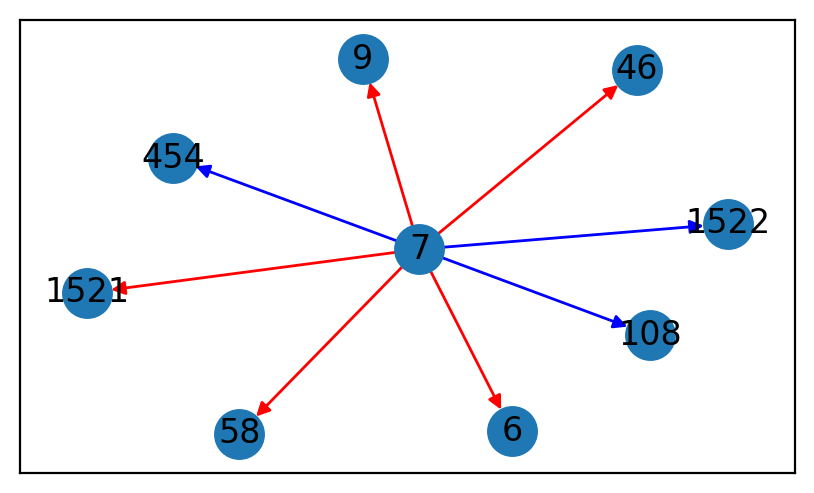

In [ ]:
fig = plt.figure(1, figsize=(5, 3), dpi= 200)
colors = nx.get_edge_attributes(K,'color').values()
nx.draw_networkx(K,with_labels = True, edge_color=colors)